In [2]:
import ROOT
import uproot
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
fileptr_2D = uproot.open("/scratch/brown/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/TUnfoldResults_2016preVFP/Nominal/combined/c_kk_mttbar.root")

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7ff84e5cd000>, cbar=<matplotlib.colorbar.Colorbar object at 0x7ff84e5cd420>, text=[])

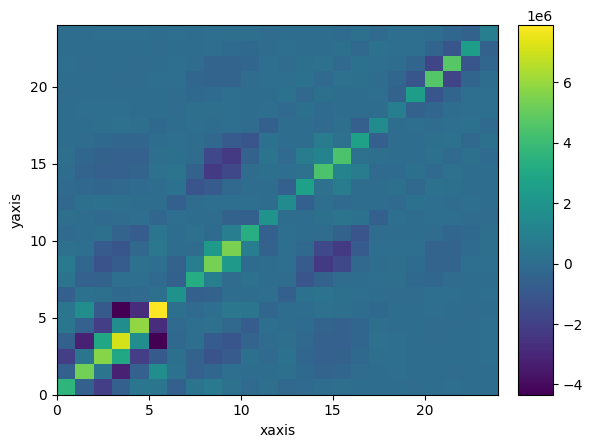

In [94]:
fileptr_2D['c_kk_mttbarEmatrix_rebinnedA'].to_hist().plot()

In [ ]:
fileptr_2D = uproot.open("/scratch/brown/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/TUnfoldResults_2016preVFP/Nominal/combined/c_kk_mttbar.root")

## First lets take the uncorrected unfolded spectra and errors

/home/bakshi3/.conda/envs/cent7/2020.11-py38/venv/lib/python3.10/site-packages/mplhep/utils.py:211: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  warnings.warn(


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff84e909cc0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

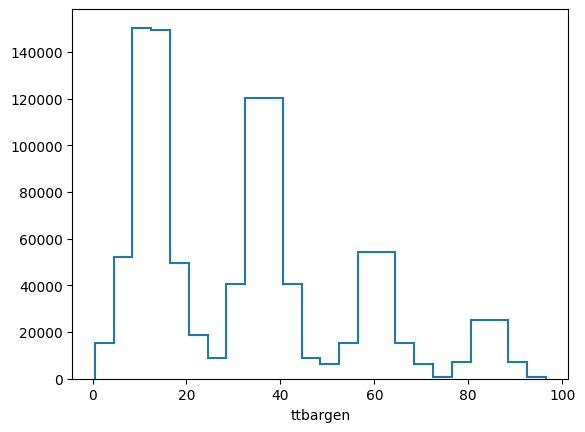

In [50]:
fileptr_2D['c_kk_mttbarTUnfResult_rebinnedA'].to_hist().plot()

In [51]:
uncorrected_unfolded_error_2D = fileptr_2D["c_kk_mttbarEmatrix_rebinnedB"].to_numpy()[0]
uncorrected_unfolded_result   = fileptr_2D['c_kk_mttbarTUnfResult_rebinnedA'].to_numpy()[0]

In [52]:
uncorrected_diagnol_error_2D  = np.sqrt([uncorrected_unfolded_error_2D[i][i] for i in range(24)])

In [53]:
uncorr_ratio = np.divide(uncorrected_diagnol_error_2D, uncorrected_unfolded_result)
uncorr_ratio

array([0.08990943, 0.05349649, 0.02685534, 0.02959131, 0.08208566,
       0.14687491, 0.17026065, 0.05185782, 0.02139579, 0.02143579,
       0.05035645, 0.16082174, 0.19472832, 0.11704034, 0.04247758,
       0.04247862, 0.11664246, 0.18986028, 0.90869393, 0.15362656,
       0.06060604, 0.06066931, 0.15367517, 0.92454957])

## Next lets look at BR and Lumi correction

/home/bakshi3/.conda/envs/cent7/2020.11-py38/venv/lib/python3.10/site-packages/mplhep/utils.py:211: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  warnings.warn(


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7ff84e76ce80>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

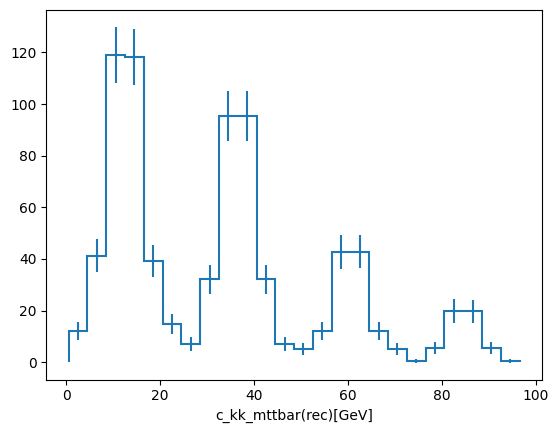

In [54]:
fileptr_2D['c_kk_mttbarTUnfResultCor_rebinnedA'].to_hist().plot()

In [55]:
lumi_corrected_unfolded_error_2D = fileptr_2D["c_kk_mttbarEmatrixCor_rebinnedB"].to_numpy()[0]
lumi_corrected_unfolded_result   = fileptr_2D['c_kk_mttbarTUnfResultCor_rebinnedA'].to_numpy()[0]

In [56]:
lumi_corrected_diagnol_error_2D  = np.sqrt([lumi_corrected_unfolded_error_2D[i][i] for i in range(24)])

In [57]:
lumi_corr_ratio = np.divide(lumi_corrected_diagnol_error_2D, lumi_corrected_unfolded_result)
lumi_corr_ratio

array([0.08990943, 0.05349649, 0.02685534, 0.02959131, 0.08208566,
       0.14687491, 0.17026065, 0.05185782, 0.02139579, 0.02143579,
       0.05035645, 0.16082174, 0.19472832, 0.11704034, 0.04247758,
       0.04247862, 0.11664246, 0.18986028, 0.90869393, 0.15362656,
       0.06060604, 0.06066931, 0.15367517, 0.92454957])

## Finally the division by binwidth

In [66]:
binFileName = "/depot/cms/top/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/binning/c_kk_mttbar_binning_rebinnedB.xml"
parser      = ROOT.TDOMParser()
parser.ParseFile(binFileName)

XMLdocument      = parser.GetXMLDocument()
generatorBinning = ROOT.TUnfoldBinningXML.ImportXML(XMLdocument,"generator_rebinnedB")
binning          = generatorBinning.FindNode("ttbargen_rebinnedB")

In [93]:
generatorBinning.FindNode("ttbargen_rebinnedB").GetDistributionDimension()

2

In [67]:
nbinsrhoi                  = len(lumi_corrected_unfolded_error_2D)
binwidthcorrected_error_2D = np.zeros((nbinsrhoi, nbinsrhoi))

## Dividing covariance matrix by binwidth

In [68]:
for i in range(nbinsrhoi) :
    for j in range(nbinsrhoi) :
        binwidthcorrected_error_2D[i,j] = lumi_corrected_unfolded_error_2D[i,j] / (binning.GetBinSize(i+1) * binning.GetBinSize(j+1))

In [86]:
binwidthcorrected_diagonal_error_2D = np.sqrt([binwidthcorrected_error_2D[i,i] for i in range(nbinsrhoi)])

## Dividing cross-section by binwidth

In [81]:
binwithcorrected_cross_section = np.zeros(nbinsrhoi)
for i in range(nbinsrhoi) :
    binwithcorrected_cross_section[i] = lumi_corrected_unfolded_result[i]/ binning.GetBinSize(i+1)

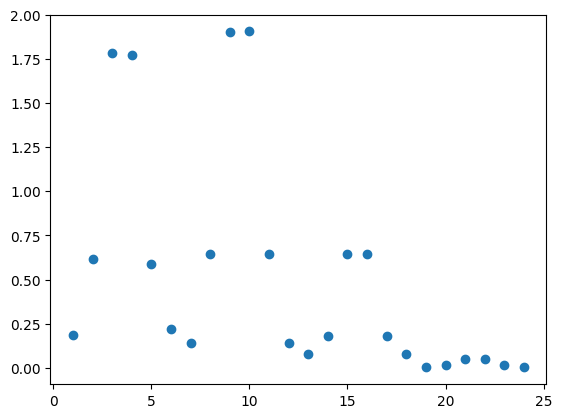

In [82]:
bins = np.linspace(1,24,24)
plt.scatter(bins, binwithcorrected_cross_section)

In [83]:
binwidthcorrected_ratio = np.divide(binwidthcorrected_diagonal_error_2D, binwithcorrected_cross_section)
binwidthcorrected_ratio

array([0.08990943, 0.05349649, 0.02685534, 0.02959131, 0.08208566,
       0.14687491, 0.17026065, 0.05185782, 0.02139579, 0.02143579,
       0.05035645, 0.16082174, 0.19472832, 0.11704034, 0.04247758,
       0.04247862, 0.11664246, 0.18986028, 0.90869393, 0.15362656,
       0.06060604, 0.06066931, 0.15367517, 0.92454957])

## Finally compare errors at all stages

In [84]:
np.divide(uncorr_ratio, lumi_corr_ratio)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [85]:
np.divide(lumi_corr_ratio, binwidthcorrected_ratio)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])